In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.dates as mdates


solar_data = pd.read_csv("data/solarpower.csv")
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [ ]:

solar_data["cum_power"] = solar_data["cum_power"].replace(-1, np.nan)  # Поиск ячеек -1 и замена их на NaN
solar_data["cum_power"] = solar_data["cum_power"].interpolate(method="linear", limit_direction="both") # Заполнение пропусков средним арифметическим между соседними наблюдениями


display(solar_data)


mean_cum_power = round(solar_data["cum_power"].mean()) # Среднее арифметическое по столбцу cum_power
print(mean_cum_power)

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


23848


In [ ]:
solar_data["day_power"] = solar_data["cum_power"].diff().fillna(0) # Разница между текущим и предыдущим значением cum_power
display(solar_data)

,date,cum_power,day_power
0,2017-01-01,20111.0,0.0
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0
...,...,...,...
659,2018-10-22,28101.0,6.0
660,2018-10-23,28109.0,8.0
661,2018-10-24,28115.0,6.0
662,2018-10-25,28117.0,2.0


In [ ]:
solar_data["day_power"] = solar_data["cum_power"].diff().fillna(0)
display(solar_data)



,date,cum_power,day_power
0,2017-01-01,20111.0,0.0
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0
...,...,...,...
659,2018-10-22,28101.0,6.0
660,2018-10-23,28109.0,8.0
661,2018-10-24,28115.0,6.0
662,2018-10-25,28117.0,2.0


In [94]:
# Преобразуем столбец 'date' в тип datetime
solar_data["date"] = pd.to_datetime(solar_data["date"])

# Группируем по году и месяцу, вычисляем среднее значение day_power
monthly_avg_power = (
    solar_data.groupby(solar_data["date"].dt.to_period("M"))["day_power"]
    .mean()
    .reset_index()
)
monthly_avg_power.columns = ["month_year", "avg_day_power"]

display(monthly_avg_power)

,month_year,avg_day_power
0,2017-01,3.129032
1,2017-02,3.714286
2,2017-03,10.774194
3,2017-04,16.300000
4,2017-05,19.000000
5,2017-06,21.500000
6,2017-07,18.129032
7,2017-08,15.064516
8,2017-09,11.533333
9,2017-10,6.419355


In [ ]:

march_2017_avg_power = monthly_avg_power[
    (monthly_avg_power["month_year"].dt.month == 3)
    & (monthly_avg_power["month_year"].dt.year == 2017)
]["avg_day_power"].values[0] # Извлечение среднего значения за март 2017 года
print(round(march_2017_avg_power))

11


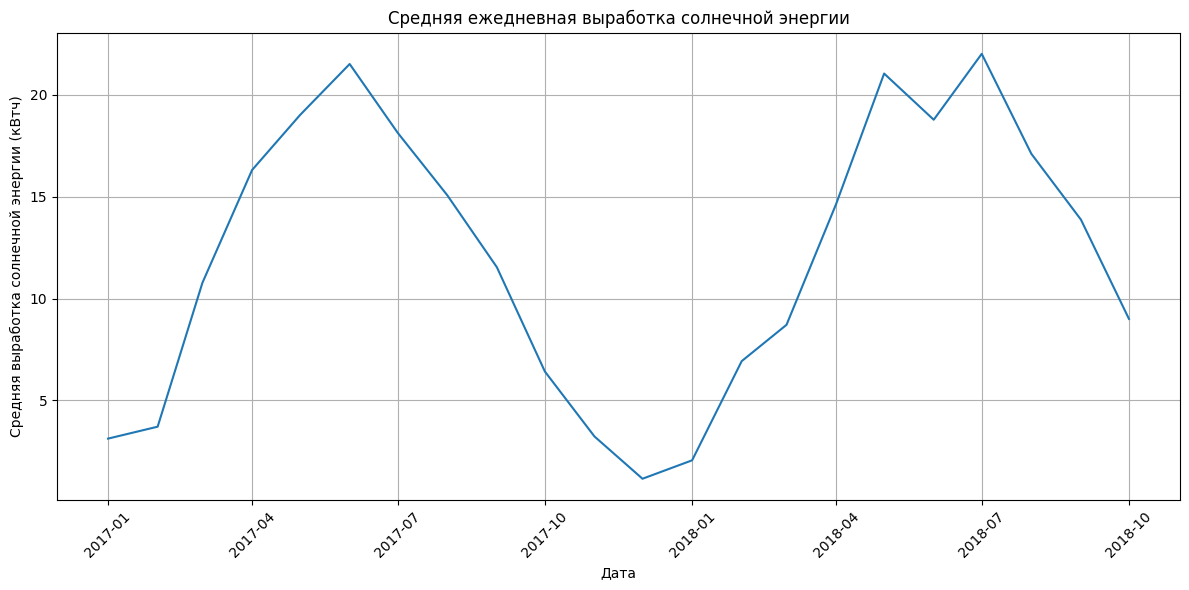

In [ ]:
# График вырабрики солнечной энергии    
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_power["month_year"].dt.to_timestamp(), monthly_avg_power["avg_day_power"])
plt.title("Средняя ежедневная выработка солнечной энергии")
plt.xlabel("Дата")
plt.ylabel("Средняя выработка солнечной энергии (кВтч)")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()